This notebook is just to inform you how the MUR data on AWS can be accessed. For the Tuesday activity, we actually relied on downloading the data first from NASA PODAAC as individual netcdf files which were combined as a single zarr store. This is for information only as the oceanuq environment is lacking some of the needed packages. Feel free to experiment in your own computing environment.

In [1]:
# standard import
import xarray as xr
import numpy as np
import clouddrift as cd
import dask

# for AWS bucket access
import fsspec
import s3fs

In [3]:
# open MUR SST on AWS
# https://registry.opendata.aws/mur/
# Multi-Scale Ultra High Resolution (MUR) Sea Surface Temperature (SST)
file_location = 's3://mur-sst/zarr'
ikey = fsspec.get_mapper(file_location, anon=True)
ds = xr.open_zarr(ikey,consolidated=True)
ds

<xarray.Dataset> Size: 104TB
Dimensions:           (time: 6443, lat: 17999, lon: 36000)
Coordinates:
  * lat               (lat) float32 72kB -89.99 -89.98 -89.97 ... 89.98 89.99
  * lon               (lon) float32 144kB -180.0 -180.0 -180.0 ... 180.0 180.0
  * time              (time) datetime64[ns] 52kB 2002-06-01T09:00:00 ... 2020...
Data variables:
    analysed_sst      (time, lat, lon) float64 33TB dask.array<chunksize=(6443, 100, 100), meta=np.ndarray>
    analysis_error    (time, lat, lon) float64 33TB dask.array<chunksize=(6443, 100, 100), meta=np.ndarray>
    mask              (time, lat, lon) int8 4TB dask.array<chunksize=(6443, 100, 100), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float64 33TB dask.array<chunksize=(6443, 100, 100), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

In [4]:
# select MUR data for a subset of the Atlantic ocean
ds_atlantic = ds.sel(lon  = slice(-60,-50), lat  = slice(30,40),)
ds_atlantic

<xarray.Dataset> Size: 161GB
Dimensions:           (time: 6443, lat: 1001, lon: 1001)
Coordinates:
  * lat               (lat) float32 4kB 30.0 30.01 30.02 ... 39.98 39.99 40.0
  * lon               (lon) float32 4kB -60.0 -59.99 -59.98 ... -50.01 -50.0
  * time              (time) datetime64[ns] 52kB 2002-06-01T09:00:00 ... 2020...
Data variables:
    analysed_sst      (time, lat, lon) float64 52GB dask.array<chunksize=(6443, 1, 1), meta=np.ndarray>
    analysis_error    (time, lat, lon) float64 52GB dask.array<chunksize=(6443, 1, 1), meta=np.ndarray>
    mask              (time, lat, lon) int8 6GB dask.array<chunksize=(6443, 1, 1), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float64 52GB dask.array<chunksize=(6443, 1, 1), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

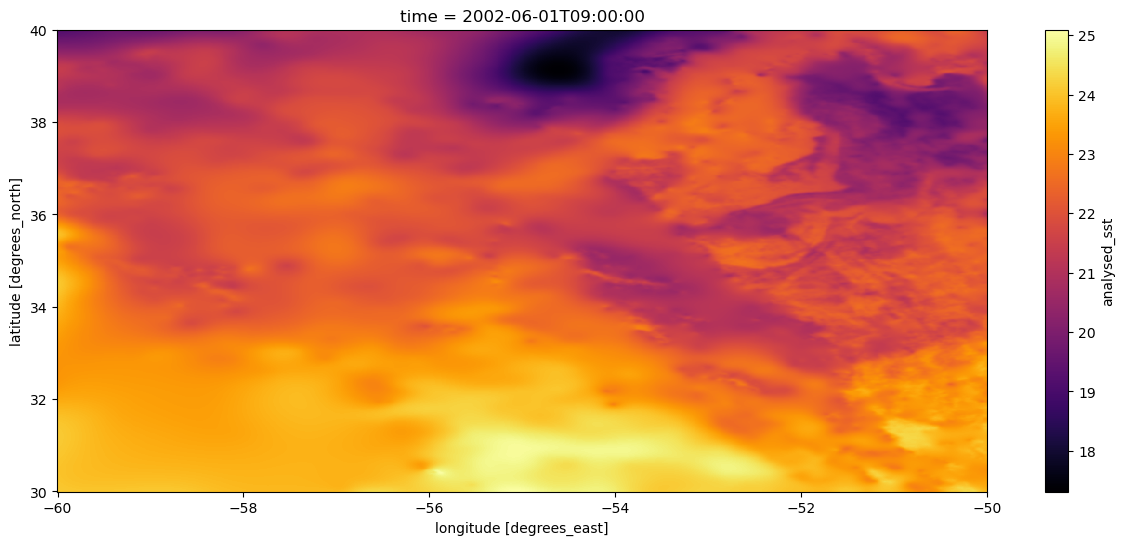

: 

In [7]:
# do a simple map plot of the first time step
(ds_atlantic["analysed_sst"][0,:,:]-273.15).where(ds_atlantic["mask"][0,:,:] == 1).plot(figsize=(15, 6), cmap="inferno")